In [1]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

/usr/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
ERROR: Could not find a version that satisfies the requirement kaggle (from versions: none)
ERROR: No matching distribution found for kaggle


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#https://www.kaggle.com/datasets/abhiramshibaraya/fingerprint-based-blood-group-detection
!kaggle datasets download -d abhiramshibaraya/fingerprint-based-blood-group-detection

/bin/bash: kaggle: command not found


In [ ]:
!unzip fingerprint-based-blood-group-detection.zip
!mkdir dataset/

Streaming output truncated to the last 5000 lines.
  inflating: dataset/AB-/augmented_cluster_5_4663.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4664.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4669.BMP  
  inflating: dataset/AB-/augmented_cluster_5_467.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4671.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4685.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4704.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4708.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4711.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4718.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4724.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4728.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4735.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4746.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4756.BMP  
  inflating: dataset/AB-/augmented_cluster_5_4759.BMP  
  inflating: dataset/AB-/augmented_cluster_5_478.BMP  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

/home/user/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


ModuleNotFoundError: No module named 'cv2'

In [ ]:
img_path = '/content/dataset/'

img_size =224

In [ ]:
os.listdir(img_path)

['AB-', 'B+', 'A+', 'O-', 'O+', 'B-', 'A-', 'AB+']

In [ ]:
class_names=os.listdir(img_path)
def get_data(data_dir):
  img_data = []
  labels=[]
  for label in class_names:
    c=0
    path = os.path.join(data_dir, label)
    class_num = class_names.index(label)
    for img in os.listdir(path):
        c+=1

        try:
          if c>=0 and c<=250:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            img_data.append(resized_arr)
            labels.append(class_num)
        except Exception as e:
            print(e)
  return np.array(img_data),np.array(labels)

In [ ]:
img_data,labels = get_data(img_path)
print(f'the shape of input image data is {img_data.shape}, labels shape is {labels.shape}')

the shape of input image data is (2000, 224, 224, 3), labels shape is (2000,)


array([[[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       ...,

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]],

       [[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]], dtype=uint8)
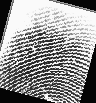

(103, 96, 3)

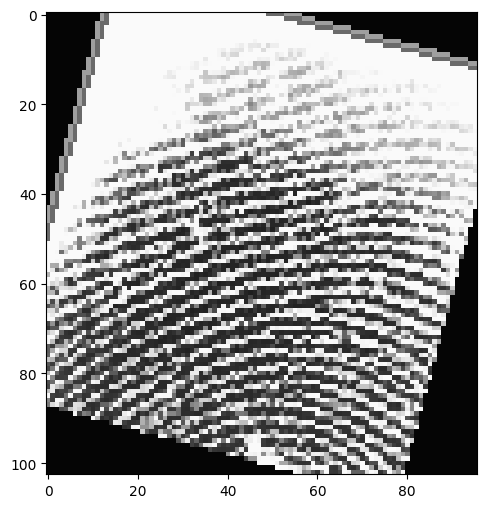

In [ ]:
plt.figure(figsize=(8,6))
img = plt.imread('/content/dataset/A+/augmented_cluster_0_16.BMP')
display(img)
print("\n")
display(img.shape)
img_nor = plt.imshow(img)
plt.show()

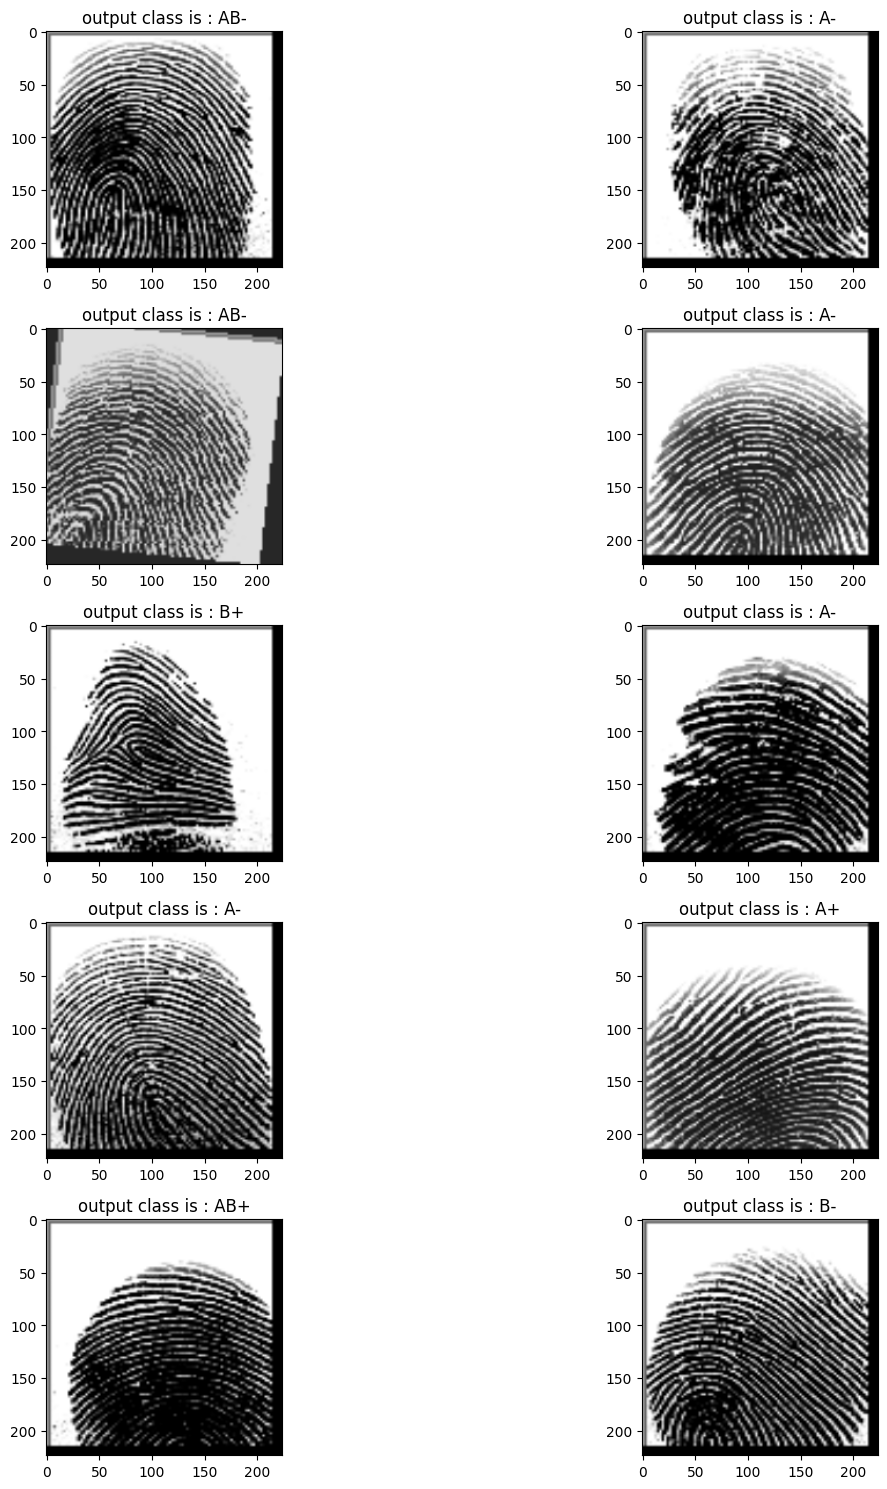

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(img_data))
        ax[i,j].imshow(img_data[l])
        ax[i,j].set_title('output class is : '+str(class_names[labels[l]]))

plt.tight_layout()

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
img_data=preprocess_input(img_data)

In [ ]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.2,random_state=0,stratify=labels)
print(f'X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

X_train size is (1600, 224, 224, 3), X_test shape is (400, 224, 224, 3)


In [ ]:
del img_data,labels

In [ ]:
#!pip install keras-nightly

**Inception V3 with Adam**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# x_train=preprocess_input(x_train)
inception=InceptionV3(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in inception.layers[:-1]:
  layer.trainable=False

model=Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(len(class_names),activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │         409,608 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,212,392 (84.73 MB)

 Trainable params: 409,608 (1.56 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate=ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.0001)
cb_early_stop=EarlyStopping(monitor = 'val_loss', patience = 2)
callbacks_list=[learning_rate,cb_early_stop]

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=128,callbacks=[callbacks_list])
#history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=128, callbacks=[callbacks_list])


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 332s 13s/step - accuracy: 0.2799 - loss: 11.8735 - val_accuracy: 0.5500 - val_loss: 3.2132 - learning_rate: 0.0010
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 374s 13s/step - accuracy: 0.6867 - loss: 1.7524 - val_accuracy: 0.6475 - val_loss: 2.1018 - learning_rate: 0.0010
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 278s 11s/step - accuracy: 0.8478 - loss: 0.6015 - val_accuracy: 0.6600 - val_loss: 1.6371 - learning_rate: 0.0010
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 342s 12s/step - accuracy: 0.8822 - loss: 0.3585 - val_accuracy: 0.6425 - val_loss: 2.1350 - learning_rate: 0.0010
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 320s 12s/step - accuracy: 0.9140 - loss: 0.2398 - val_accuracy: 0.6675 - val_loss: 2.0214 - learning_rate: 0.0010


Text(0.5, 1.0, 'val accuracy')

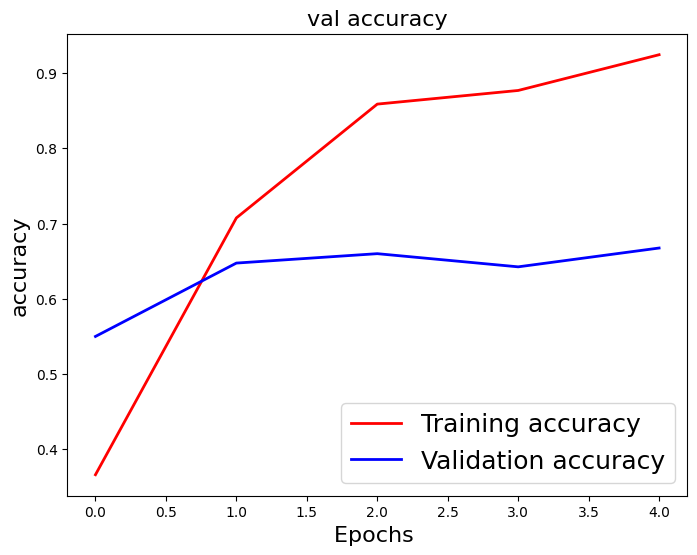

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [ ]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_test_labels=np.argmax(y_test,axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 4s/step


Accuracy : 66.75


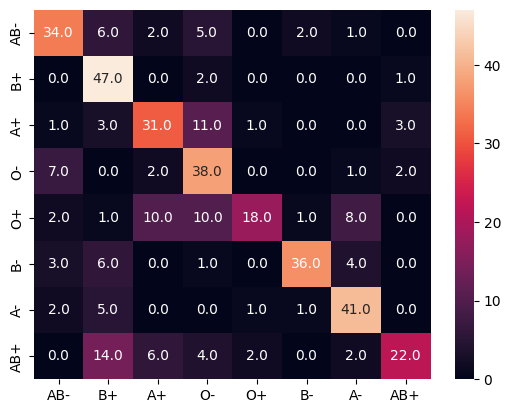

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
# print(confusion_matrix(y_test_labels,y_pred_classes))
sns.heatmap(confusion_matrix(y_test_labels,y_pred_classes),yticklabels=class_names,xticklabels=class_names,annot=True,fmt='.1f') # calculating the confusion matrix
accuracy=accuracy_score(y_test_labels,y_pred_classes)*100 # calculating the accuracy
print(f'Accuracy : {accuracy}')

**Using SGD as a optimizer**

In [ ]:
inception=InceptionV3(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in inception.layers[:-1]:
  layer.trainable=False

model2=Sequential()
model2.add(inception)
model2.add(Flatten())
model2.add(Dense(len(class_names),activation='softmax'))

model2.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │         409,608 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,212,392 (84.73 MB)

 Trainable params: 409,608 (1.56 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=128,callbacks=[callbacks_list])

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 307s 23s/step - accuracy: 0.1517 - loss: 50.6867 - val_accuracy: 0.2000 - val_loss: 66.5469 - learning_rate: 0.0100
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 313s 23s/step - accuracy: 0.2877 - loss: 46.8506 - val_accuracy: 0.3550 - val_loss: 16.1848 - learning_rate: 0.0100
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 300s 21s/step - accuracy: 0.4098 - loss: 16.6083 - val_accuracy: 0.4125 - val_loss: 21.3736 - learning_rate: 0.0100
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 344s 23s/step - accuracy: 0.4470 - loss: 15.7367 - val_accuracy: 0.4675 - val_loss: 8.3485 - learning_rate: 0.0100
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 295s 21s/step - accuracy: 0.5351 - loss: 10.0553 - val_accuracy: 0.3950 - val_loss: 14.8452 - learning_rate: 0.0100


In [ ]:
sgd_acc=model2.evaluate(X_test,y_test)[1]
sgd_acc

13/13 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.4017 - loss: 15.0818


0.39500001072883606

Text(0.5, 1.0, 'val accuracy')

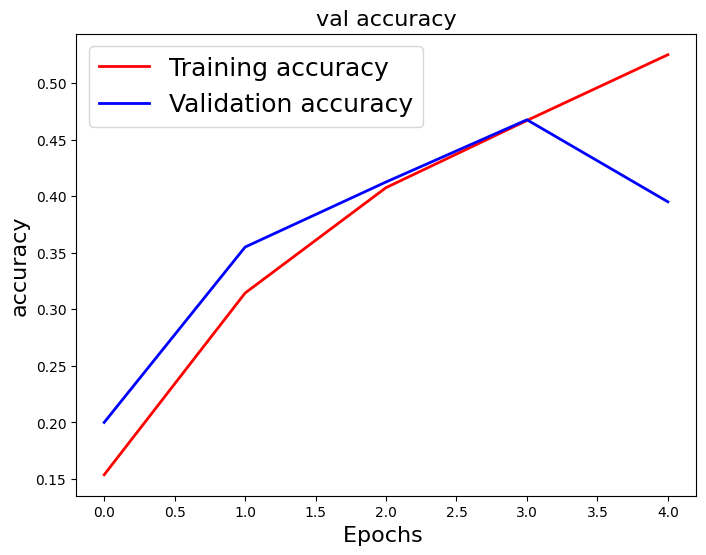

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

**Using RMSprop as a optimizer**

In [ ]:
inception=InceptionV3(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in inception.layers[:-1]:
  layer.trainable=False

model3=Sequential()
model3.add(inception)
model3.add(Flatten())
model3.add(Dense(len(class_names),activation='softmax'))

model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │         409,608 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,212,392 (84.73 MB)

 Trainable params: 409,608 (1.56 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
history3=model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=128,callbacks=[callbacks_list])

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 309s 23s/step - accuracy: 0.1711 - loss: 42.0207 - val_accuracy: 0.3350 - val_loss: 11.8217 - learning_rate: 0.0010
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 313s 23s/step - accuracy: 0.4016 - loss: 9.4348 - val_accuracy: 0.3750 - val_loss: 10.2077 - learning_rate: 0.0010
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 323s 23s/step - accuracy: 0.4255 - loss: 9.9667 - val_accuracy: 0.5200 - val_loss: 5.5400 - learning_rate: 0.0010
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 290s 23s/step - accuracy: 0.5852 - loss: 5.2962 - val_accuracy: 0.4025 - val_loss: 12.1466 - learning_rate: 0.0010
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 258s 20s/step - accuracy: 0.5978 - loss: 5.7638 - val_accuracy: 0.3925 - val_loss: 12.1365 - learning_rate: 0.0010


In [ ]:
rms_acc=model3.evaluate(X_test,y_test)[1]
rms_acc

13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.3922 - loss: 11.8946


0.39250001311302185

Text(0.5, 1.0, 'val accuracy')

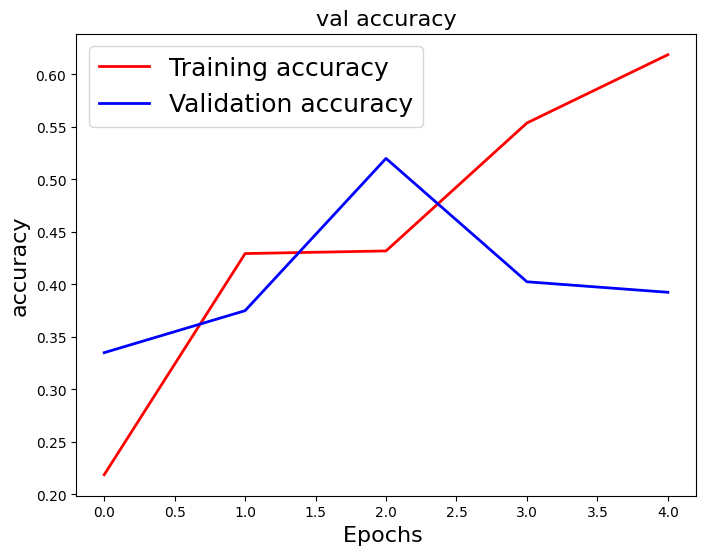

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['accuracy'],'r',linewidth=2.0)
plt.plot(history3.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

Text(0, 0.5, 'accuracy')

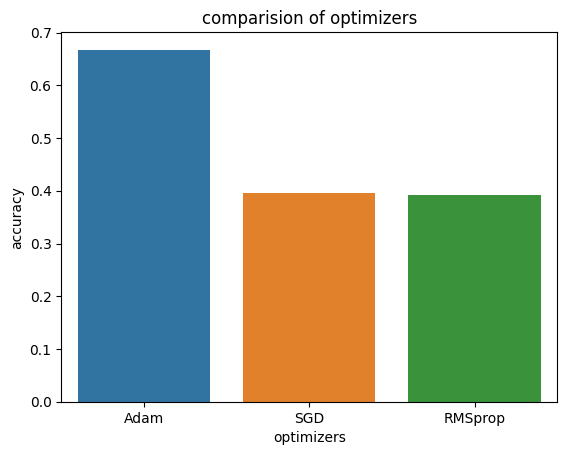

In [ ]:
results=pd.DataFrame(data=[[(accuracy/100),sgd_acc,rms_acc]],columns=['Adam','SGD','RMSprop'])
# results.head()
sns.barplot(data=results)
plt.title('comparision of optimizers')
plt.xlabel('optimizers')
plt.ylabel('accuracy')

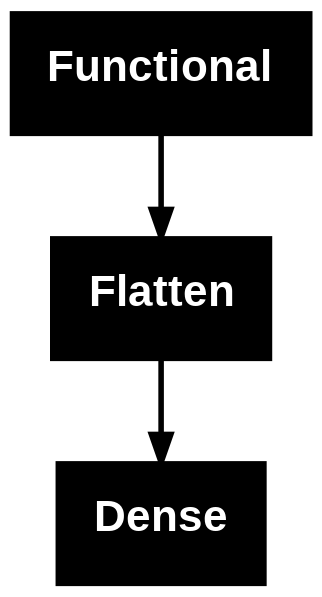

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
X_train.shape

(1600, 224, 224, 3)

In [ ]:
X_train1=X_train.reshape(-1,img_size*img_size*3)
X_test1=X_test.reshape(-1,img_size*img_size*3)
y_train1=np.argmax(y_train,axis=1)
y_test1=np.argmax(y_test,axis=1)
X_train1.shape

(1600, 150528)

# Additional Part
**testing with the images**

In [ ]:

from google.colab import files
files.upload()
print("Image uploaded succcesfully....")

{}

(1, 224, 224, 3)

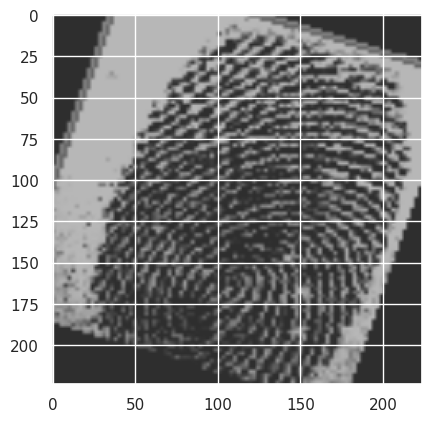

In [ ]:
image_name='/content/dataset/O-/augmented_cluster_7_4067.BMP'   # enter image name to test

x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


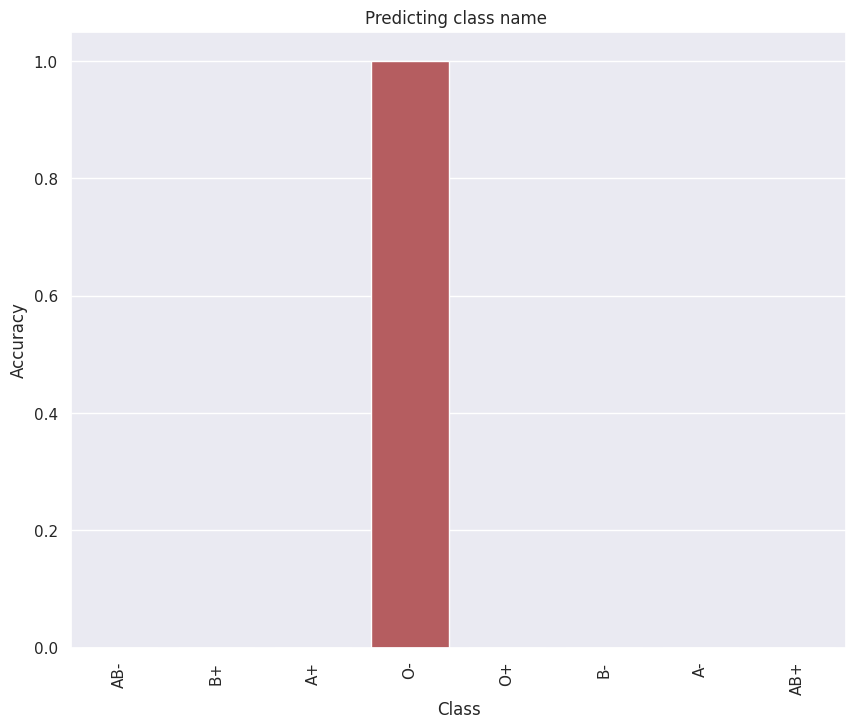

In [ ]:
pred=model.predict(x1) # for predicting class
labels_pred=np.argmax(pred,axis=1)
labels=class_names[labels_pred[0]]
pred_results=pd.DataFrame(data=pred,columns=class_names)
fig=plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
ax.set_xticklabels(class_names,rotation=90)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Predicting class name ')
plt.show()